# importing libraries

In [ ]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql


In [2]:
#Loading dataset
salary=pd.read_csv(r"Final.csv",encoding="latin-1")
salary_BK=salary.copy()
salary.sample(10)

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
1783,3.7,Harshit Info Solutions,895209,"10,74,965","11,63,057",/yr
267,3.9,Mercedes-Benz International,79502,"42,900","1,55,855",/yr
1390,4.1,Rohit Industries Group,20085,"24,038","26,175",/yr
1461,NaN,Shssns,418074,"4,98,189","5,46,996",/yr
531,4.0,Congregation Brit Shalom,513452,"6,14,098","6,69,532",/yr
3555,2.7,IMMO Information Technology,13658,"16,390","17,756",/yr
1459,NaN,Beatroot Technologies,448111,"5,38,121","5,82,157",/yr
2282,4.3,Meta,2113524,"6,00,000","46,83,810",/yr
1022,3.8,Inspirisys Solutions Limited,888786,"5,38,822","16,83,144",/yr
340,3.9,Bounce,27186,"32,556","35,408",/yr


In [3]:
#inoformation about data frame
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    3854 non-null   float64
 1   Company   4100 non-null   object 
 2   Average   4100 non-null   object 
 3   Lowest    4100 non-null   object 
 4   Highest   4100 non-null   object 
 5   yr/mo/hr  4100 non-null   object 
dtypes: float64(1), object(5)
memory usage: 192.3+ KB


In [4]:
#converting strings into integers
salary['Lowest']= salary['Lowest'].str.replace(',','').astype(int)
salary['Highest']= salary['Highest'].str.replace(',','').astype(int)
salary['Average']=salary['Average'].str.replace(',','').astype(int)

In [5]:
#printing 1st 5 entires in the dataframe

salary.head()

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
0,3.6,Tech Mahindra,937156,418054,2335432,/yr
1,3.7,Optum,1508702,887265,2400000,/yr
2,4.1,Fresher,540557,189354,1472751,/yr
3,3.7,HCL Technologies,887986,416339,1926785,/yr
4,3.9,Genpact,972181,249195,2382853,/yr


In [6]:
#shape of the dataframe
salary.shape

(4100, 6)

In [7]:
#checkig for null values
salary.isnull().sum()

Rating      246
Company       0
Average       0
Lowest        0
Highest       0
yr/mo/hr      0
dtype: int64

<Axes: >

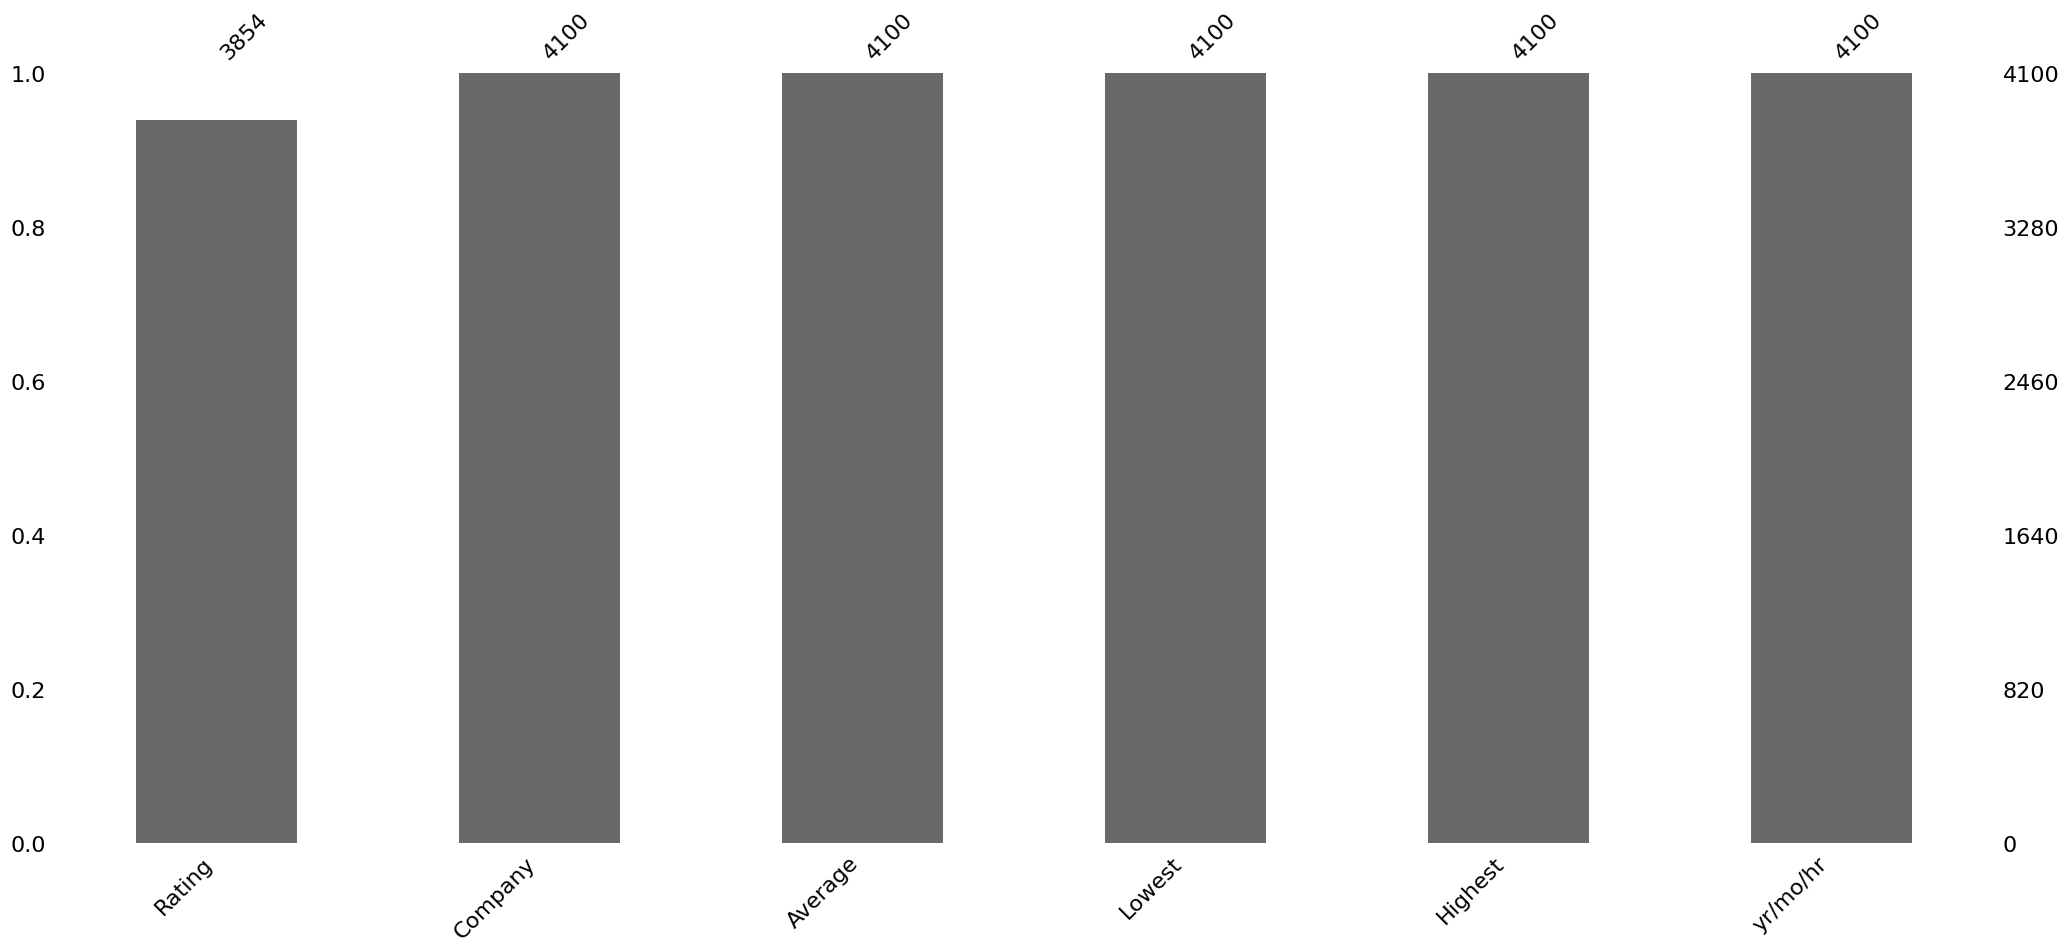

In [8]:
import missingno as msno
msno.bar(salary)

In [9]:
#checking for duplicate values
salary_dup=salary[salary.duplicated(keep="last")]
salary_dup

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
337,3.9,Tata Consultancy Services,931124,512507,1815302,/yr


In [10]:
#droping duplicate values

salary = salary.drop_duplicates()

In [11]:
#shape after removing duplicates
salary.shape

(4099, 6)

In [12]:
salary

,Rating,Company,Average,Lowest,Highest,yr/mo/hr
0,3.6,Tech Mahindra,937156,418054,2335432,/yr
1,3.7,Optum,1508702,887265,2400000,/yr
2,4.1,Fresher,540557,189354,1472751,/yr
3,3.7,HCL Technologies,887986,416339,1926785,/yr
4,3.9,Genpact,972181,249195,2382853,/yr
...,...,...,...,...,...,...
4095,4.5,Google,5877867,7005287,7689380,/mo
4096,3.6,Bookmyshow,244504,292593,318666,/mo
4097,3.9,Philips,163488,196938,211783,/mo
4098,3.5,CL Educate,49324,59388,63923,/mo


In [13]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4099 entries, 0 to 4099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    3853 non-null   float64
 1   Company   4099 non-null   object 
 2   Average   4099 non-null   int32  
 3   Lowest    4099 non-null   int32  
 4   Highest   4099 non-null   int32  
 5   yr/mo/hr  4099 non-null   object 
dtypes: float64(1), int32(3), object(2)
memory usage: 176.1+ KB


In [14]:
#checking number of values in yr/mo/hr column
salary["yr/mo/hr"].value_counts()

yr/mo/hr
/yr    3906
/mo     188
/hr       5
Name: count, dtype: int64

In [15]:
#renaming column from yr/mo/hr to yr_mo_hr
salary.rename(columns = {'yr/mo/hr':'yr_mo_hr'}, inplace = True)


In [16]:
#filling null values using mean()
salary['Rating'].fillna(value=salary['Rating'].mean(), inplace=True)

In [17]:
salary.head()


,Rating,Company,Average,Lowest,Highest,yr_mo_hr
0,3.6,Tech Mahindra,937156,418054,2335432,/yr
1,3.7,Optum,1508702,887265,2400000,/yr
2,4.1,Fresher,540557,189354,1472751,/yr
3,3.7,HCL Technologies,887986,416339,1926785,/yr
4,3.9,Genpact,972181,249195,2382853,/yr


<Axes: >

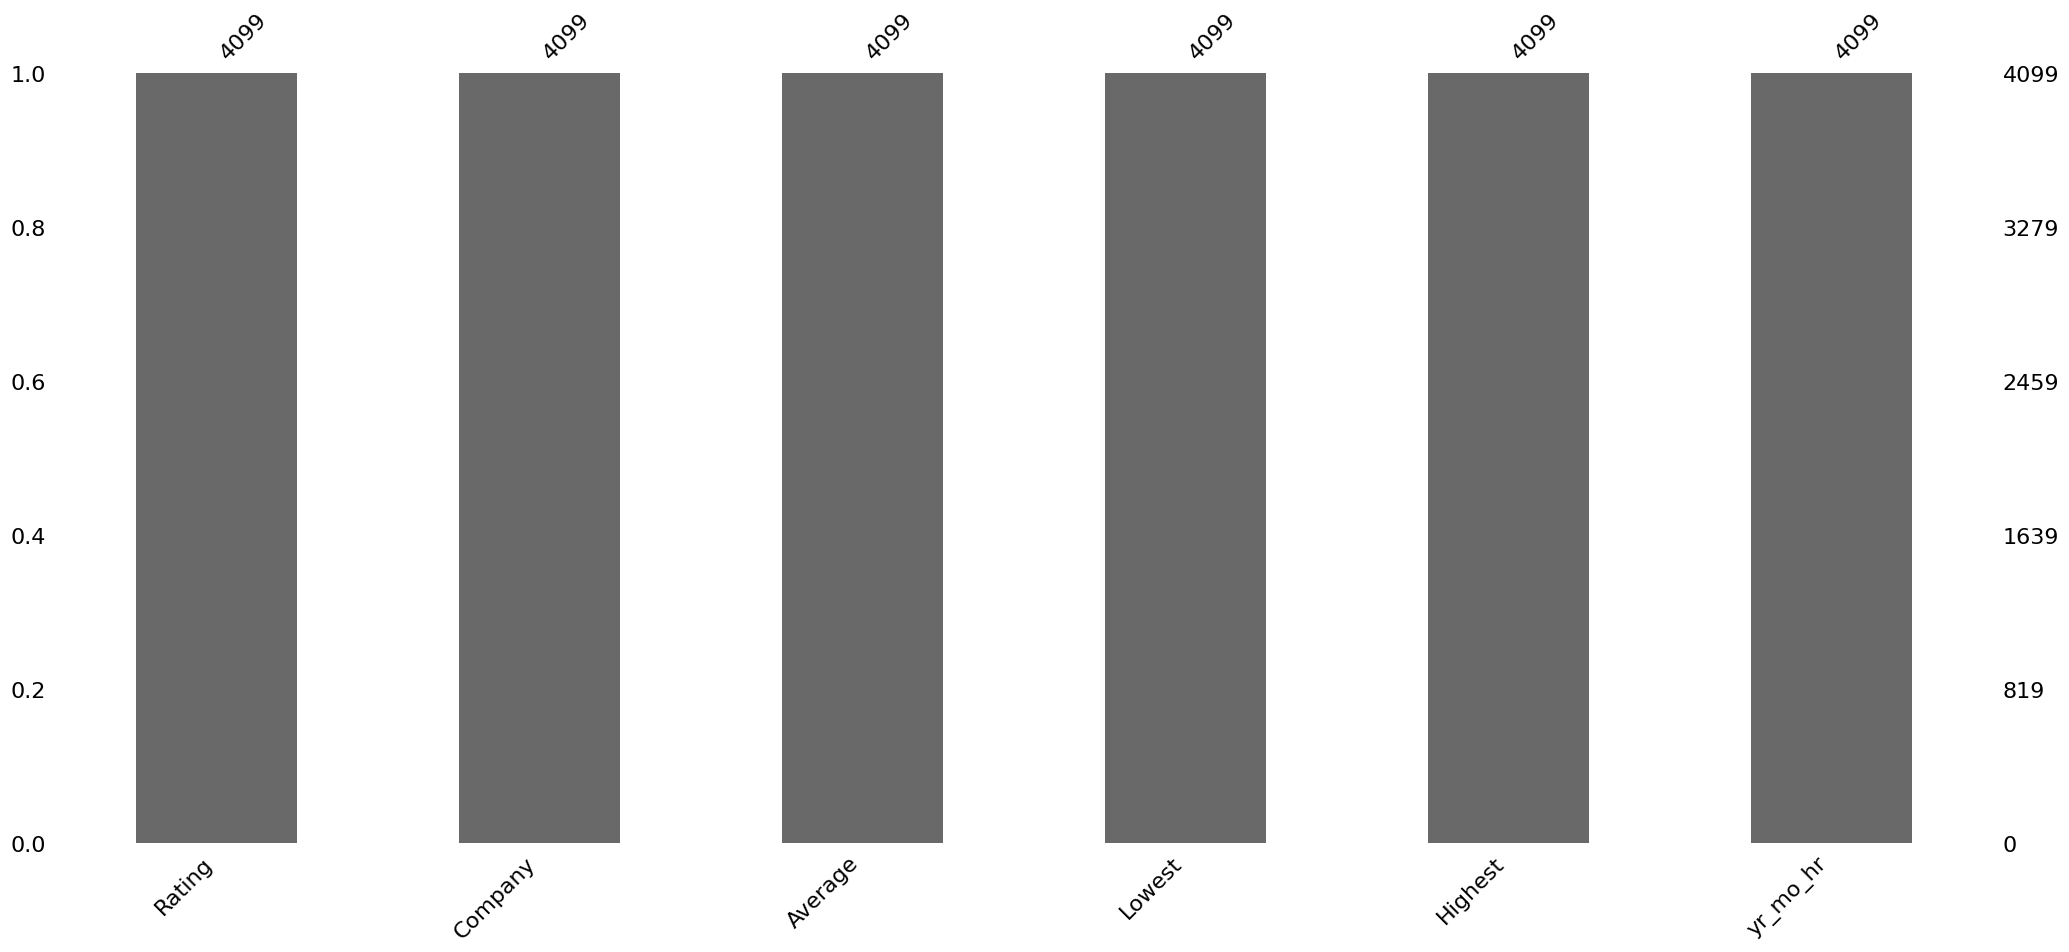

In [18]:
import missingno as msno
msno.bar(salary)

In [19]:
#describing the data frame
salary.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Rating,4099.0,3.932494e+00,5.224561e-01,1.0,3.7,3.932494,4.2,5.0
Average,4099.0,7.607633e+05,1.552574e+06,14.0,81403.0,557358.000000,1025721.0,84045868.0
Lowest,4099.0,7.675707e+05,1.789652e+06,1.0,85091.0,538121.000000,1015906.5,100956920.0
Highest,4099.0,1.139846e+06,2.241478e+06,19.0,109089.5,758889.000000,1564853.0,109157751.0


In [20]:
salary.yr_mo_hr.value_counts()

yr_mo_hr
/yr    3906
/mo     188
/hr       5
Name: count, dtype: int64

<BarContainer object of 3 artists>

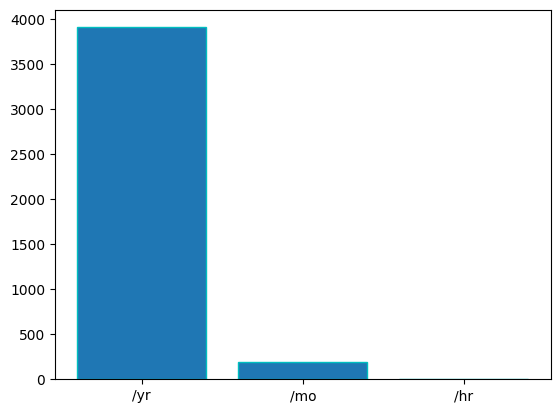

In [21]:
plt.bar(salary.yr_mo_hr.unique(),salary.yr_mo_hr.value_counts(),edgecolor = 'c')

In [70]:
salary.nunique()

Rating       40
Company    3230
Average    4034
Lowest     3866
Highest    3883
dtype: int64

In [22]:
#CONVERTING HOURLY SALARIES INTO MONTHWISE
#The known average work hours in India are 40 hours per week & there are on avg 4 working weeks per month
#Average work hours for a month = 40 * 4 

salary['Average'].loc[salary['yr_mo_hr'] == '/hr'] = salary['Average'].loc[salary['yr_mo_hr'] == '/hr'] * 40 * 4
salary['Lowest'].loc[salary['yr_mo_hr'] == '/hr'] = salary['Lowest'].loc[salary['yr_mo_hr'] == '/hr'] * 40 * 4 
salary['Highest'].loc[salary['yr_mo_hr'] == '/hr'] = salary['Highest'].loc[salary['yr_mo_hr'] == '/hr'] * 40 * 4
salary['yr_mo_hr'].loc[salary['yr_mo_hr'] == '/hr'] = '/mo'

#CONVERTING MONTHLY SALARIES INTO YEARWISE
salary['Average'].loc[salary['yr_mo_hr'] == '/mo'] = salary['Average'].loc[salary['yr_mo_hr'] == '/mo'] * 12
salary['Lowest'].loc[salary['yr_mo_hr'] == '/mo'] = salary['Lowest'].loc[salary['yr_mo_hr'] == '/mo'] * 12
salary['Highest'].loc[salary['yr_mo_hr'] == '/mo'] = salary['Highest'].loc[salary['yr_mo_hr'] == '/mo'] * 12
salary['yr_mo_hr'].loc[salary['yr_mo_hr'] == '/mo'] = '/yr'



In [23]:
#aftering converting to /yr checking for values in yr_mo_hr
salary["yr_mo_hr"].value_counts()

yr_mo_hr
/yr    4099
Name: count, dtype: int64

<BarContainer object of 1 artists>

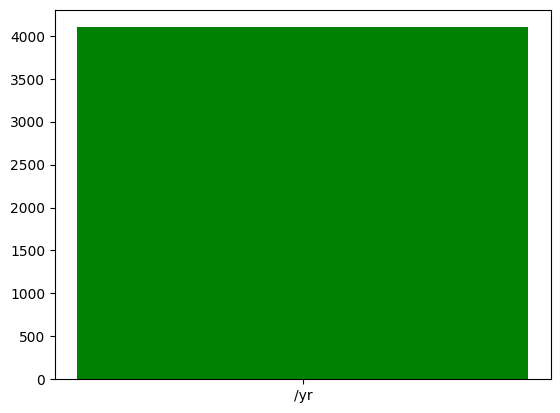

In [24]:
plt.bar(salary.yr_mo_hr.unique(),salary.yr_mo_hr.value_counts(),color = 'green')

In [25]:
#checking number of values in Company column

salary.Company.value_counts()

Company
Tata Consultancy Services    18
Accenture                    15
IBM                          14
Fresher                      12
dunnhumby                    11
                             ..
Ankit                         1
PlotMyData                    1
YOGESH SHARMA                 1
Raj Mahawala                  1
CL Educate                    1
Name: count, Length: 3230, dtype: int64

In [26]:
salary.head()

,Rating,Company,Average,Lowest,Highest,yr_mo_hr
0,3.6,Tech Mahindra,937156,418054,2335432,/yr
1,3.7,Optum,1508702,887265,2400000,/yr
2,4.1,Fresher,540557,189354,1472751,/yr
3,3.7,HCL Technologies,887986,416339,1926785,/yr
4,3.9,Genpact,972181,249195,2382853,/yr


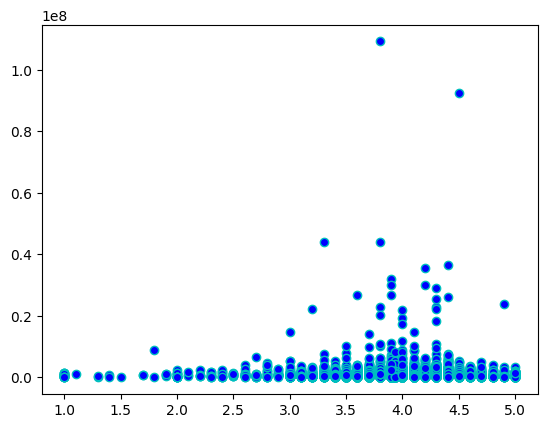

In [27]:
plt.scatter(salary['Rating'],salary['Highest'],color = 'b',edgecolor = 'c')
plt.show()

In [28]:
# plt.figure(figsize = (9,125))
# plt.bar(salary['Rating'],salary['Company'],color = 'b',edgecolor = 'c',axis = 1)
# plt.show()

In [29]:
#Use LabelEncoder to handle categorical variable

from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
salary['Company']=LE.fit_transform(salary[['Company']])

In [30]:
salary.Company.value_counts()

Company
2692    18
93      15
1294    14
1037    12
3143    11
        ..
232      1
2103     1
3062     1
2236     1
517      1
Name: count, Length: 3230, dtype: int64

In [31]:
#droping yr_mo_hr column
salary.drop('yr_mo_hr', axis=1, inplace=True)


In [32]:
salary.head()

,Rating,Company,Average,Lowest,Highest
0,3.6,2713,937156,418054,2335432
1,3.7,2021,1508702,887265,2400000
2,4.1,1037,540557,189354,1472751
3,3.7,1185,887986,416339,1926785
4,3.9,1100,972181,249195,2382853


In [33]:
a = list(salary.columns[0:])
a.remove("Company")
a

['Rating', 'Average', 'Lowest', 'Highest']

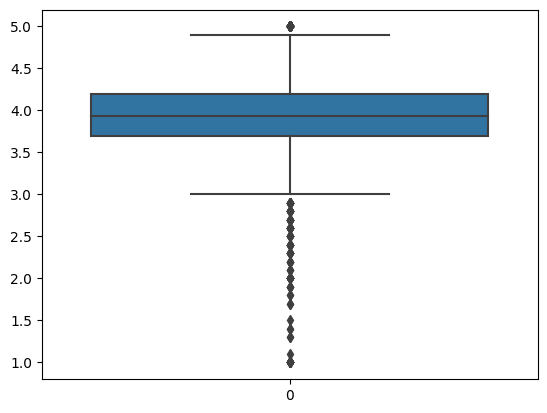

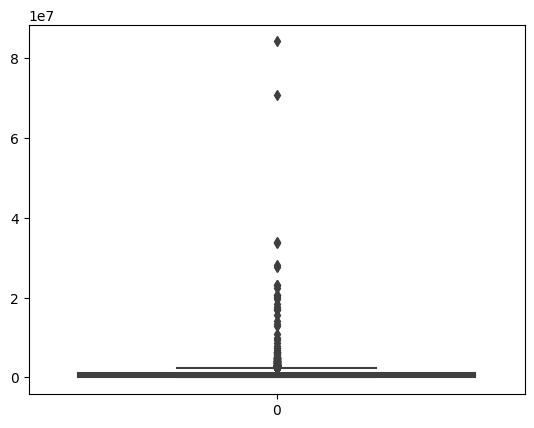

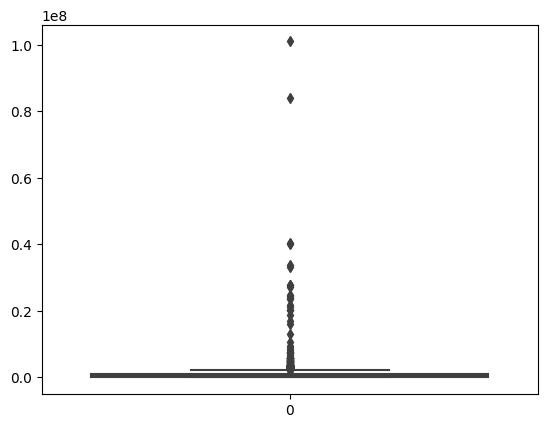

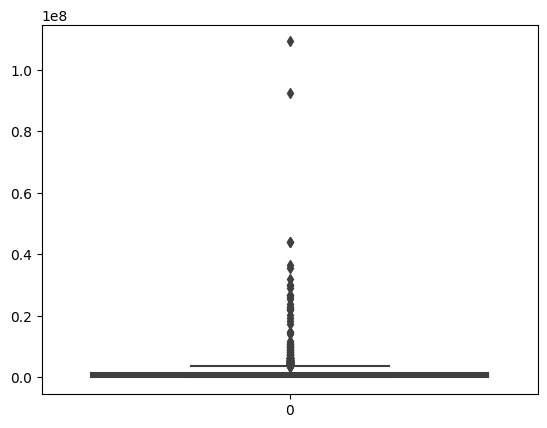

In [34]:
#outliers visualization using seaborn
import seaborn as sns
for i in a:
    sns.boxplot(salary[i])
    plt.show()


In [35]:
#calculating outliers upper and lower limit of average
upper_limit=round(salary.Average.mean()+3*salary.Average.std(),3)
lower_limit=round(salary.Average.mean()-3*salary.Average.std(),3)


In [36]:

salary_new=salary[(salary.Average>lower_limit)&(salary.Average<upper_limit)]
salary_new.head()

,Rating,Company,Average,Lowest,Highest
0,3.6,2713,937156,418054,2335432
1,3.7,2021,1508702,887265,2400000
2,4.1,1037,540557,189354,1472751
3,3.7,1185,887986,416339,1926785
4,3.9,1100,972181,249195,2382853


In [37]:
salary_new.shape

(4074, 5)

In [38]:
salary_new=salary[(salary.Average>lower_limit)&(salary.Average<upper_limit)]


,Rating,Company,Average,Lowest,Highest
212,3.9,533,8700562,10519513,11231892
480,3.9,855,12822875,210393,31846794
871,3.8,2231,84045868,100956920,109157751
2373,4.3,795,9885288,1713219,23000000
3636,3.2,239,9275753,934483,22254900
4074,4.0,558,13375080,16186632,17251080
4076,3.6,2870,20536116,24481980,26858304
4077,3.7,474,10786992,13002312,13965168
4078,4.2,840,27603888,33305640,35704068
4079,4.4,1901,20025144,24026712,26036136


In [39]:
#droping outliers
salary.drop(outliers.index,axis=0)

,Rating,Company,Average,Lowest,Highest
0,3.6,2713,937156,418054,2335432
1,3.7,2021,1508702,887265,2400000
2,4.1,1037,540557,189354,1472751
3,3.7,1185,887986,416339,1926785
4,3.9,1100,972181,249195,2382853
...,...,...,...,...,...
4094,3.4,2136,279408,337644,360888
4096,3.6,459,2934048,3511116,3823992
4097,3.9,2086,1961856,2363256,2541396
4098,3.5,517,591888,712656,767076


In [40]:
#information of data frame after removing outliers
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4099 entries, 0 to 4099
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   4099 non-null   float64
 1   Company  4099 non-null   int32  
 2   Average  4099 non-null   int32  
 3   Lowest   4099 non-null   int32  
 4   Highest  4099 non-null   int32  
dtypes: float64(1), int32(4)
memory usage: 257.1 KB


In [41]:
#calculating outliers upper and lower limit of Rating
upper_limit=round(salary.Rating.mean()+3*salary.Rating.std(),3)
lower_limit=round(salary.Rating.mean()-3*salary.Rating.std(),3)
salary_new1=salary[(salary.Rating>lower_limit)&(salary.Rating<upper_limit)]
salary_new1.head()

,Rating,Company,Average,Lowest,Highest
0,3.6,2713,937156,418054,2335432
1,3.7,2021,1508702,887265,2400000
2,4.1,1037,540557,189354,1472751
3,3.7,1185,887986,416339,1926785
4,3.9,1100,972181,249195,2382853


In [42]:
#finding outliers in rating 
outliers1=salary[(salary.Rating>upper_limit)|(salary.Rating<lower_limit)]
outliers1

,Rating,Company,Average,Lowest,Highest
105,1.0,3046,537369,269525,918834
3448,1.7,1125,501381,604683,648770
3452,1.0,136,490446,588094,638021
3455,1.4,892,613646,734869,799247
3461,2.2,1029,1775375,2140296,2298141
...,...,...,...,...,...
3744,2.0,1391,16748,20183,21686
3750,2.0,619,13339,15901,17447
3845,1.9,585,286740,296784,420072
4031,1.9,2577,800732,963720,1038110


In [43]:
#droping outliers in average
salary.drop(outliers1.index,axis=0)

,Rating,Company,Average,Lowest,Highest
0,3.6,2713,937156,418054,2335432
1,3.7,2021,1508702,887265,2400000
2,4.1,1037,540557,189354,1472751
3,3.7,1185,887986,416339,1926785
4,3.9,1100,972181,249195,2382853
...,...,...,...,...,...
4095,4.5,1141,70534404,84063444,92272560
4096,3.6,459,2934048,3511116,3823992
4097,3.9,2086,1961856,2363256,2541396
4098,3.5,517,591888,712656,767076


In [44]:
#shape after removing outliers
salary_new1.shape

(4038, 5)

In [45]:
#Identify the independent and target variable

IndepVar=[]
for col in salary.columns:
    if col!='Average':
        IndepVar.append(col)
        
        
TargetVar='Average'

x=salary[IndepVar]
y=salary[TargetVar]

In [46]:
x

,Rating,Company,Lowest,Highest
0,3.6,2713,418054,2335432
1,3.7,2021,887265,2400000
2,4.1,1037,189354,1472751
3,3.7,1185,416339,1926785
4,3.9,1100,249195,2382853
...,...,...,...,...
4095,4.5,1141,84063444,92272560
4096,3.6,459,3511116,3823992
4097,3.9,2086,2363256,2541396
4098,3.5,517,712656,767076


In [47]:
y

0         937156
1        1508702
2         540557
3         887986
4         972181
          ...   
4095    70534404
4096     2934048
4097     1961856
4098      591888
4099      260160
Name: Average, Length: 4099, dtype: int32

In [48]:
salary

,Rating,Company,Average,Lowest,Highest
0,3.6,2713,937156,418054,2335432
1,3.7,2021,1508702,887265,2400000
2,4.1,1037,540557,189354,1472751
3,3.7,1185,887986,416339,1926785
4,3.9,1100,972181,249195,2382853
...,...,...,...,...,...
4095,4.5,1141,70534404,84063444,92272560
4096,3.6,459,2934048,3511116,3823992
4097,3.9,2086,1961856,2363256,2541396
4098,3.5,517,591888,712656,767076


In [49]:
# from sklearn.preprocessing import MinMaxScaler

# mmscaler=MinMaxScaler(feature_range=(0,1))
# salary=pd.DataFrame(mmscaler.fit_transform(salary),columns=salary.columns)

In [50]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,4099.0,3.932494e+00,5.224561e-01,1.0,3.7,3.932494,4.2,5.0
Company,4099.0,1.611815e+03,9.352175e+02,0.0,816.5,1595.000000,2425.5,3229.0
Average,4099.0,8.875343e+05,2.370186e+06,14.0,161078.0,578276.000000,1042658.0,84045868.0
Lowest,4099.0,9.077262e+05,2.799527e+06,10.0,127674.0,556425.000000,1018397.5,100956920.0
Highest,4099.0,1.317262e+06,3.232375e+06,19.0,215987.0,812792.000000,1594131.5,109157751.0


In [51]:
#Split the data into train and test(random sampling)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=42)

#Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2869, 4), (1230, 4), (2869,), (1230,))

In [52]:
# #Scaling the features by using MinMaxScaler

# from sklearn.preprocessing import MinMaxScaler

# mmscaler=MinMaxScaler(feature_range=(0,1))

# x_train=mmscaler.fit_transform(x_train)
# ytrain=mmscaler.fit_transform([y_train])

# #x_train[cols]=mmscaler.fit_transform(x_train[cols])
# x_train=pd.DataFrame(x_train)

# x_test=mmscaler.fit_transform(x_test)
# y_test=mmscaler.fit_transform([y_test])

# #x_test[cols]=mmscaler.fit_transform(x_test[cols])
# x_test=pd.DataFrame(x_test)

In [53]:
from sklearn.linear_model import LinearRegression
ModelLR=LinearRegression()
ModelLR.fit(x_train,y_train)
y_pred=ModelLR.predict(x_test)


In [54]:
y_test.shape

(1230,)

In [55]:
y_pred.shape

(1230,)

In [56]:
from sklearn import metrics

print('Mean Absolute Error(MAE):',round(metrics.mean_absolute_error(y_test,y_pred),3))
print('Mean Squared Error(MSE):',round(metrics.mean_squared_error(y_test,y_pred),3))
print('Root Mean Squared Error(RMSE):',np.sqrt(round(metrics.mean_absolute_error(y_test,y_pred),3)))
print('R2_Square:',round(metrics.r2_score(y_test,y_pred),6))
print('Mean Absolute Percentage Error(MAPE):',round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print('Root Mean Squared Log Error(RMSLE):',round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

Mean Absolute Error(MAE): 36213.837
Mean Squared Error(MSE): 12977366141.448
Root Mean Squared Error(RMSE): 190.29933525895459
R2_Square: 0.993546
Mean Absolute Percentage Error(MAPE): 227.8 %
Root Mean Squared Log Error(RMSLE): 11.643


In [57]:
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

Mean Absolute Percentage Error (MAPE): 227.8 %


In [58]:
y_test

2821      32445
890      561371
2608      31521
1294     696178
1671      16896
         ...   
1768     437221
59      2110642
1212    1406092
1895      63273
1458     409427
Name: Average, Length: 1230, dtype: int32

In [59]:
y_pred

array([  47410.3634139 ,  576852.57697277,   48612.86389067, ...,
       1421749.26281939,   77947.35376581,  424960.7664368 ])

In [60]:
round(y_test - y_pred,3)

2821    -14965.363
890     -15481.577
2608    -17091.864
1294      7641.187
1671    -17173.493
           ...    
1768     19569.464
59      168930.951
1212    -15657.263
1895    -14674.354
1458    -15533.766
Name: Average, Length: 1230, dtype: float64

In [61]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.99354


In [62]:
# Display the Final results 

Results = pd.DataFrame({'Average_A':y_test, 'Average_p':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = salary_BK.merge(Results, left_index=True, right_index=True)

# Display 10 records randomly


ResultsFinal['%Error']=round(((ResultsFinal['Average_A']-ResultsFinal['Average_p'])/ResultsFinal['Average_A'])*100,3)
ResultsFinal.head()


,Rating,Company,Average,Lowest,Highest,yr/mo/hr,Average_A,Average_p,%Error
0,3.6,Tech Mahindra,937156,"4,18,054","23,35,432",/yr,937156,1.010079e+06,-7.781
6,3.6,UnitedHealth Group,1361430,"5,14,511","20,48,386",/yr,1361430,9.564299e+05,29.748
7,4.3,Embibe,1452596,"9,15,998","22,47,916",/yr,1452596,1.209055e+06,16.766
8,3.8,Reliance Industries,982518,"5,00,000","27,43,551",/yr,982518,1.187516e+06,-20.865
12,3.8,Nielsen,740158,"6,31,179","14,13,263",/yr,740158,7.920703e+05,-7.014


In [63]:
#Load 

RGRResults=pd.read_csv("RGRResults.csv",header=0)
RGRResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [64]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelBRR = BayesianRidge()
ModelSVR = SVR()

# Evalution matrix for all the algorithms

MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR, ModelSVR] 


for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : round(metrics.mean_absolute_error(y_test, y_pred),3),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
#     RGRResults = RGRResults.append(new_row, ignore_index=True)
    RGRResults = pd.concat([RGRResults, pd.DataFrame([new_row])], ignore_index=True)
    #-------------------------------------------------------------------------------------------





Model Name:  LinearRegression()
Mean Absolute Error (MAE): 36213.837
Mean Squared Error (MSE): 12977366141.448
Root Mean Squared Error (RMSE): 113918.243
R2_score: 0.993546
Root Mean Squared Log Error (RMSLE): 11.643
Mean Absolute Percentage Error (MAPE): 227.8 %
Adj R Square:  0.99354
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 38624.945
Mean Squared Error (MSE): 30731063244.793
Root Mean Squared Error (RMSE): 175302.776
R2_score: 0.984716
Root Mean Squared Log Error (RMSLE): 12.074
Mean Absolute Percentage Error (MAPE): 4.46 %
Adj R Square:  0.984701
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 31054.994
Mean Squared Error (MSE): 34298444337.98
Root Mean Squared Error (RMSE): 185198.392
R2_score: 0.982942
Root Mean Squared Log Erro

In [65]:
#pritng RGRResults
RGRResults

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),36213.837,0.993540,1.139182e+05,227.800488,1.297737e+10,11.643236,0.993546
1,DecisionTreeRegressor(),38624.945,0.984701,1.753028e+05,4.458836,3.073106e+10,12.074270,0.984716
2,"(DecisionTreeRegressor(max_features=1.0, rando...",31054.994,0.982925,1.851984e+05,3.416382,3.429844e+10,12.129183,0.982942
3,"(ExtraTreeRegressor(random_state=1303409997), ...",27873.848,0.985765,1.690953e+05,3.181156,2.859323e+10,12.038218,0.985779
4,KNeighborsRegressor(),36218.916,0.962070,2.760250e+05,4.411914,7.618978e+10,12.528247,0.962107
5,BayesianRidge(),36203.788,0.993540,1.139179e+05,221.279161,1.297730e+10,11.643234,0.993546
6,SVR(),606073.395,-0.035620,1.442313e+06,7804.681978,2.080265e+12,14.181758,-0.034609


In [66]:
#predicting values
y_predF=ModelETR.predict(x_test)

In [67]:
x_test

,Rating,Company,Lowest,Highest
2821,3.500000,567,38889,42224
890,3.800000,1903,668216,735211
2608,3.600000,3178,37922,40880
1294,4.100000,1637,637252,1103193
1671,3.932494,3134,20186,22053
...,...,...,...,...
1768,3.700000,1499,228894,864159
59,4.200000,2630,222128,5318266
1212,4.100000,810,1689860,1825370
1895,3.700000,172,75384,82798


In [68]:
# Display the Final results 

Results = pd.DataFrame({'Average_A':y_test, 'Average_p':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = salary_BK.merge(Results, left_index=True, right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)

,Rating,Company,Average,Lowest,Highest,yr/mo/hr,Average_A,Average_p
1721,3.7,TCL-Alcatel Mobile,942234,"11,22,913","12,32,673",/yr,942234,941289.11
1515,NaN,serbfsf,801624,"9,67,840","10,36,220",/yr,801624,801299.58
512,4.0,Arya Solution,456016,"5,49,098","5,90,941",/yr,456016,455482.52
3546,2.7,Sankhya Analytical Research,40863,"48,712","53,446",/yr,40863,40873.38
2000,4.2,Accion Labs,27993,"33,649","36,333",/yr,27993,27946.54
1030,3.8,Refinitiv,803327,"2,19,976","17,88,341",/yr,803327,850307.06
2408,4.4,Fluentgrid,753048,"9,04,800","9,77,820",/yr,753048,753674.97
1633,NaN,Scalein,1245717,"14,84,571","16,29,721",/yr,1245717,1245278.00
2177,4.3,Kangaroo Software,332003,"3,99,381","4,30,627",/yr,332003,331954.05
4060,4.3,Cisco Systems,"25,09,997","30,05,453","32,69,539",/yr,2509997,2517264.21
